In [144]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

For both loss_log files, I removed certain characters that interfered with parsing file before reading in the file to simplify process

In [158]:
#Loss log when using face edges as input
sdloss_file = pd.read_csv('smalldatasetloss_log.txt', delimiter=' ', skiprows=1, header=None)

In [159]:
#Loss log when usng realistic sketches as input
rsdloss_file = pd.read_csv('realisticsmalldatasetloss_log.txt', delimiter=' ', skiprows=1, header=None)

In [147]:
sdloss_file.head

<bound method NDFrame.head of         0    1      2    3     4   ...      12     13      14     15  16
0    epoch    1  iters  100  time  ...  D_real  0.069  D_fake  0.032 NaN
1    epoch    2  iters  100  time  ...  D_real  0.044  D_fake  0.397 NaN
2    epoch    3  iters  100  time  ...  D_real  0.373  D_fake  0.185 NaN
3    epoch    4  iters  100  time  ...  D_real  0.001  D_fake  0.557 NaN
4    epoch    5  iters  100  time  ...  D_real  0.001  D_fake  0.216 NaN
..     ...  ...    ...  ...   ...  ...     ...    ...     ...    ...  ..
195  epoch  196  iters  100  time  ...  D_real  0.299  D_fake  0.402 NaN
196  epoch  197  iters  100  time  ...  D_real  0.000  D_fake  0.037 NaN
197  epoch  198  iters  100  time  ...  D_real  0.299  D_fake  0.257 NaN
198  epoch  199  iters  100  time  ...  D_real  0.235  D_fake  0.037 NaN
199  epoch  200  iters  100  time  ...  D_real  0.220  D_fake  0.152 NaN

[200 rows x 17 columns]>

In [148]:
#indices to remove (contains names)
remove_indices = [0,2,4,6,8,10,12,14,16]

In [149]:
#drop the columns that are not data
sdloss_file.drop(sdloss_file.columns[remove_indices], axis=1, inplace=True)

In [150]:
rsdloss_file.drop(rsdloss_file.columns[remove_indices], axis=1, inplace=True)

In [151]:
#Add columns names taken  from dropped columns
sdloss_file.columns = ['epoch', 'iters', 'time', 'data', 'G_GAN', 'G_L1', 'D_real', 'D_fake']
rsdloss_file.columns = ['epoch', 'iters', 'time', 'data', 'G_GAN', 'G_L1', 'D_real', 'D_fake']

# ***What each loss means***
**G_GAN** is the GAN loss for the generator

**G_L1** is the loss that is used to minimize error 

**D_real** is the discriminator loss regarding real input

**D_fake** is the discriminator loss regarding fake input

# ***Color coding***
Red colored labels uses face edges as inputs

Blue colored labels uses realistic as inputs

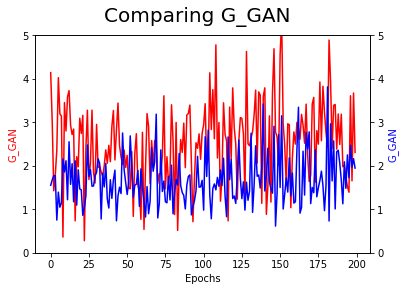

In [153]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
fig.suptitle('Comparing G_GAN', fontsize=20)
ax1.set_ylim([0,5])
ax1.plot(sdloss_file['G_GAN'],'r')
ax2.set_ylim(ax1.get_ylim())
ax2.plot(rsdloss_file['G_GAN'],'b')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('G_GAN', color = 'r')
ax2.set_ylabel('G_GAN', color = 'b')
#Need to savefig before plt.show() or it will save blank pick
plt.savefig('ComparingG_GAN.png')
plt.show()

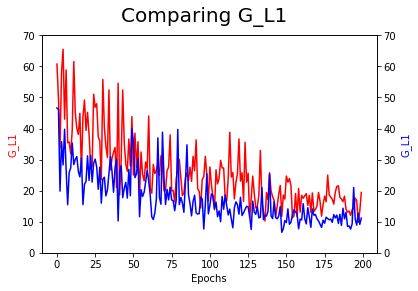

In [154]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
fig.suptitle('Comparing G_L1', fontsize=20)
ax1.set_ylim([0,70])
ax1.plot(sdloss_file['G_L1'],'r')
ax2.set_ylim(ax1.get_ylim())
ax2.plot(rsdloss_file['G_L1'],'b')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('G_L1', color = 'r')
ax2.set_ylabel('G_L1', color = 'b')
plt.savefig('ComparingG_L1.png')
plt.show()

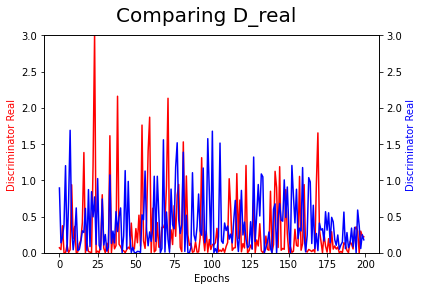

In [155]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
fig.suptitle('Comparing D_real', fontsize=20)
ax1.set_ylim([0,3])
ax1.plot(sdloss_file['D_real'],'r')
ax2.set_ylim(ax1.get_ylim())
ax2.plot(rsdloss_file['D_real'],'b')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Discriminator Real', color = 'r')
ax2.set_ylabel('Discriminator Real', color = 'b')
plt.savefig('ComparingD_real.png')
plt.show()

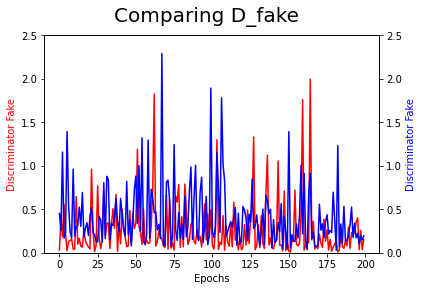

In [156]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
fig.suptitle('Comparing D_fake', fontsize=20)
ax1.set_ylim([0,2.5])
ax1.plot(sdloss_file['D_fake'],'r')
ax2.set_ylim(ax1.get_ylim())
ax2.plot(rsdloss_file['D_fake'],'b')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Discriminator Fake', color = 'r')
ax2.set_ylabel('Discriminator Fake', color = 'b')
plt.savefig('ComparingD_fake.png')
plt.show()

# ***Relationship of each graph***
The Generator(G_GAN) and Discriminator(D_real, D_fake) losses oscillates and does not seem to give good indications of performance.

G_L1 loss shows steady decline through epochs.